# **Chest X-Ray Images Classifier using Fast.ai**

In [8]:
from fastai.vision import (ImageList,ClassificationInterpretation, get_transforms,
                           imagenet_stats, ImageDataBunch, models, cnn_learner)
from fastai.metrics import error_rate
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from google.colab import drive
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="torch.nn.functional")

In [6]:
#Mounting drive to access Google Drive
drive.mount('/content/drive')

#Converting to DataFrame and sorting values
path='/content/drive/My Drive/Colab Notebooks/chest_xray3/'
tfms = get_transforms(do_flip=True, max_rotate = 12, max_zoom = 1.5)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [9]:
data = (ImageList.from_folder(path).split_by_folder().label_from_folder().transform(tfms, size=256).databunch())
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (2482 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
NORMAL,NORMAL,NORMAL,NORMAL,NORMAL
Path: /content/drive/My Drive/Colab Notebooks/chest_xray3;

Valid: LabelList (684 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
PNEUMONIA,PNEUMONIA,PNEUMONIA,PNEUMONIA,PNEUMONIA
Path: /content/drive/My Drive/Colab Notebooks/chest_xray3;

Test: None

In [13]:
print(f'\n{data.c} classes: {data.classes}')


2 classes: ['NORMAL', 'PNEUMONIA']


In [14]:
print(f'\nTraining images: {len(data.train_ds)}',
      f'\nValidation images: {len(data.valid_ds)}')


Training images: 2482 
Validation images: 684


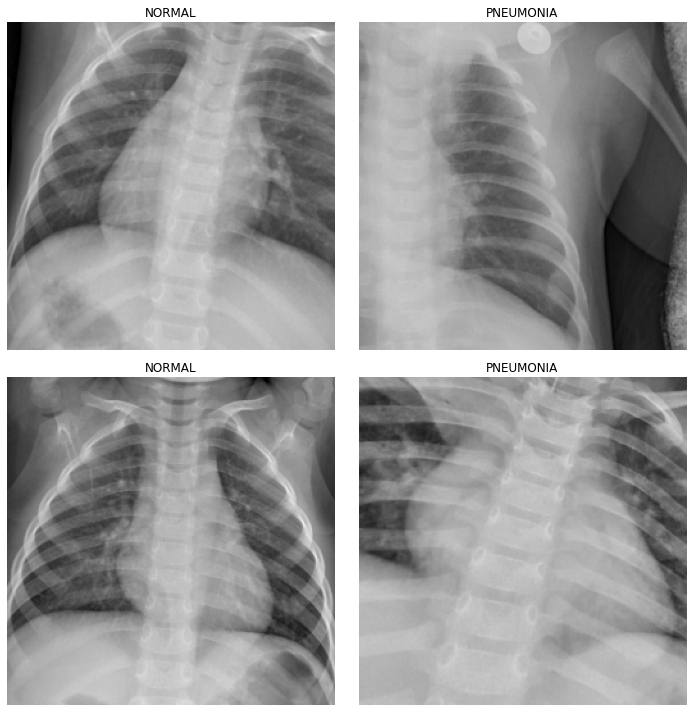

In [10]:
data.show_batch(2, figsize=(10,10))

In [11]:
learn = cnn_learner(data, models.resnet34, metrics = error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [12]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.535140,0.637661,0.171053,11:21
1,0.374964,0.491576,0.133041,02:35
2,0.297274,0.391089,0.112573,02:29
3,0.251556,0.397178,0.125731,02:28


In [15]:
learn.save('stage1')

In [16]:
learn.unfreeze()

In [17]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


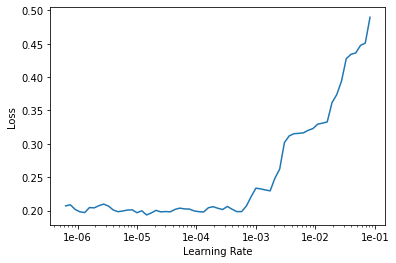

In [18]:
learn.recorder.plot()

In [19]:
learn.fit_one_cycle(10, max_lr=slice(1e-6, 3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.222116,0.399864,0.119883,02:36
1,0.209842,0.396320,0.115497,02:39
2,0.201259,0.325502,0.105263,02:39
3,0.165439,0.278919,0.081871,02:41
4,0.140005,0.322635,0.092105,02:42
5,0.131728,0.275111,0.077485,02:41
6,0.131189,0.269858,0.076023,02:42
7,0.123538,0.248914,0.074561,02:42
8,0.114168,0.256984,0.074561,02:42
9,0.110835,0.253239,0.070175,02:41


In [20]:
learn.save('stage2')

In [21]:
interp = ClassificationInterpretation.from_learner(learn)

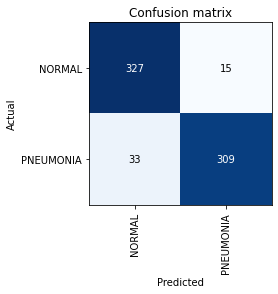

In [22]:
interp.plot_confusion_matrix()